In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Loading Dataset

In [2]:
data_df = pd.read_csv("../data/happiness_data.csv")
data_df

,Year,Rank,Country,HappinessScore,upperwhisker,lowerwhisker,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2020,146,Lesotho,3.512,3.748,3.276,0.451,0.731,0.007,0.405,0.103,0.015,1.800
713,2020,147,Botswana,3.467,3.611,3.322,1.099,0.724,0.340,0.539,0.027,0.088,0.648
714,2020,148,Rwanda,3.415,3.548,3.282,0.364,0.202,0.407,0.627,0.227,0.493,1.095
715,2020,149,Zimbabwe,3.145,3.259,3.030,0.457,0.649,0.243,0.359,0.157,0.075,1.205


### Get top-20 countries by Happiness Score

In [3]:
top_20_countries = (
    data_df.groupby("Country")["HappinessScore"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index.tolist()
)
top_20_df = data_df[data_df["Country"].isin(top_20_countries)]

### Static Line Plot of Top-20 Countries

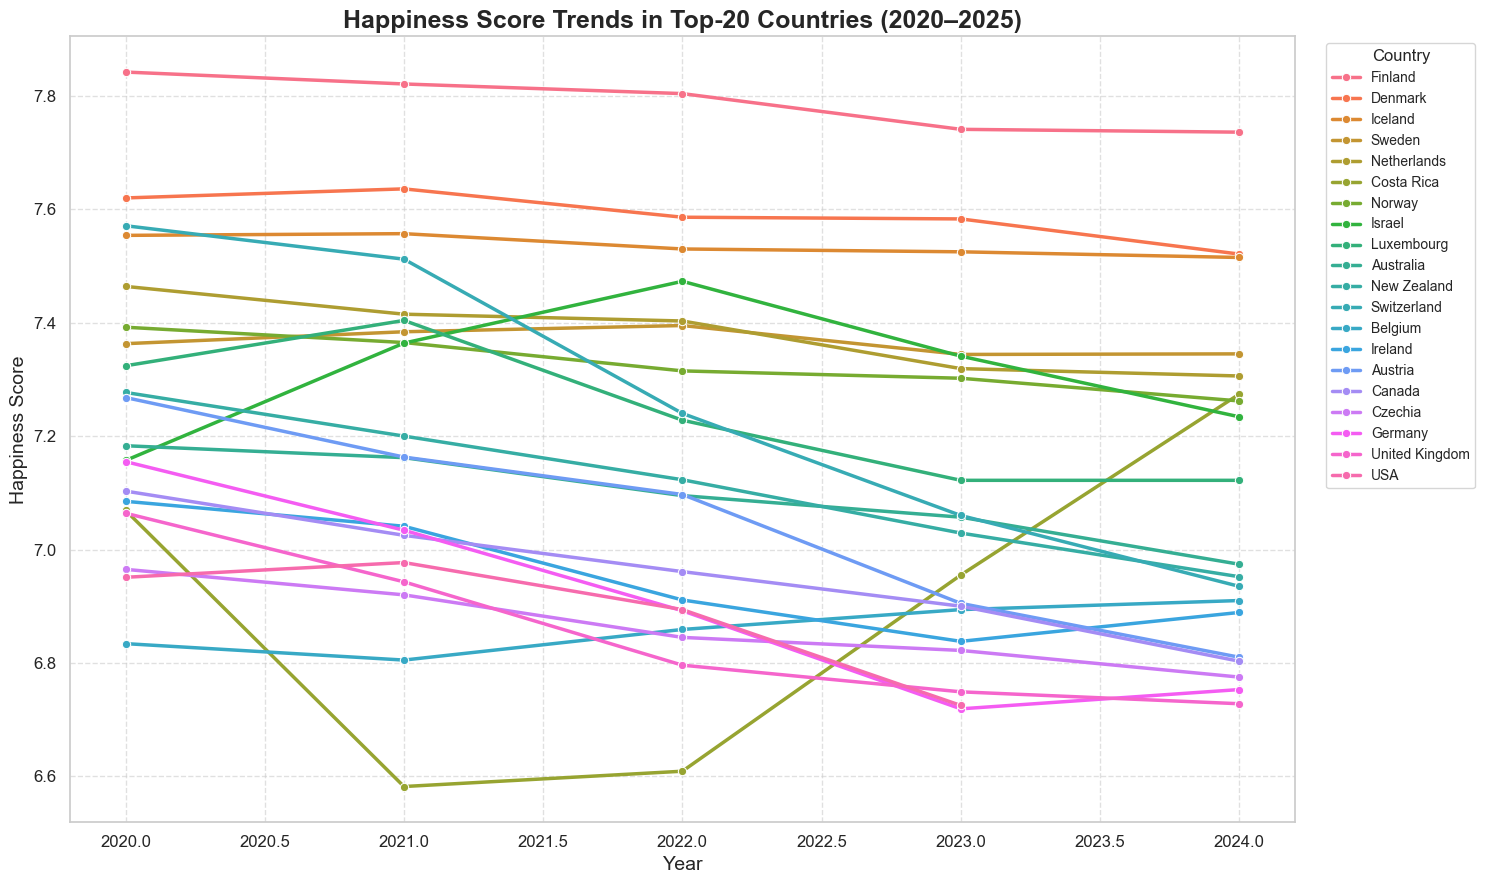

In [4]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 9))
palette = sns.color_palette("husl", len(top_20_countries)) 

sns.lineplot(
    data=top_20_df,
    x="Year",
    y="HappinessScore",
    hue="Country",
    marker="o",
    linewidth=2.5,
    palette=palette
)

plt.title("Happiness Score Trends in Top-20 Countries (2020–2025)", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Happiness Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Animated Line Plot with matplotlib.animation

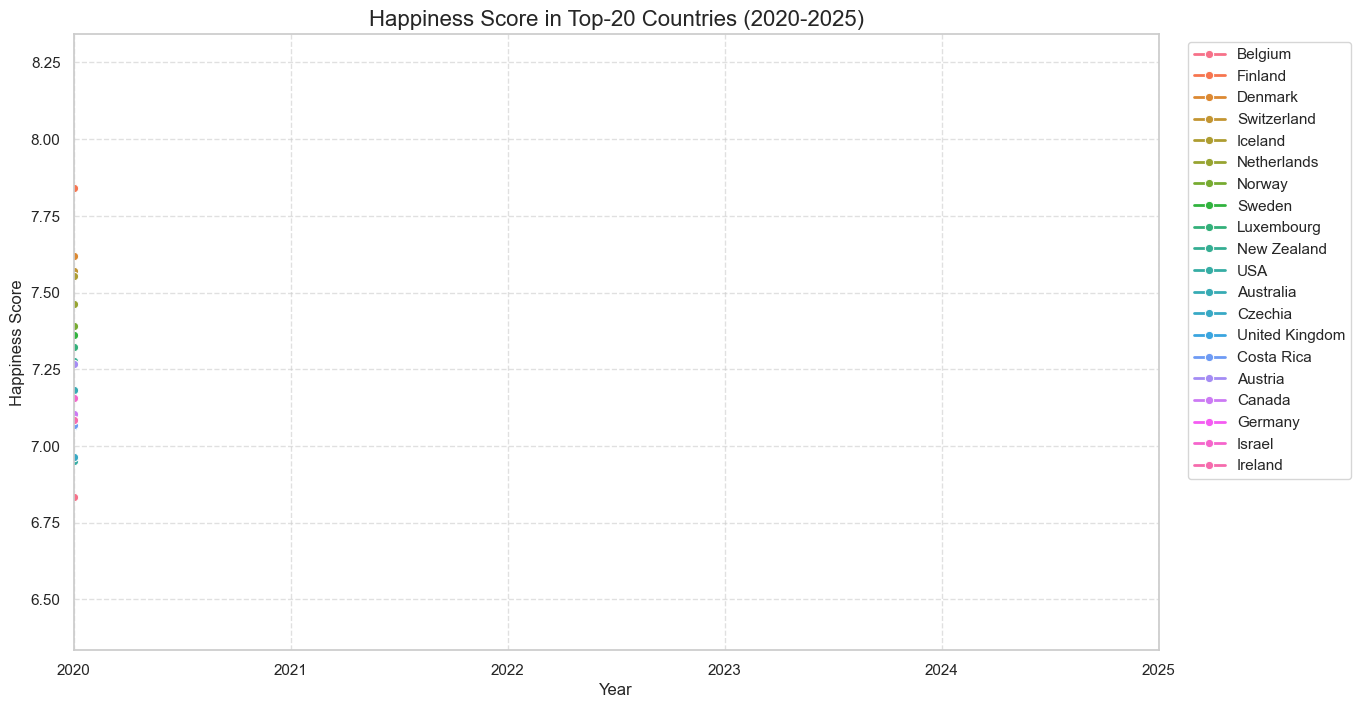

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))

top_20_df_sorted = top_20_df.sort_values("Year")

def animate(year):
    ax.clear()
    data = top_20_df_sorted[top_20_df_sorted["Year"] <= year]
    sns.lineplot(data=data, x="Year", y="HappinessScore", hue="Country", ax=ax, marker="o", linewidth=2)
    ax.set_title(f"Happiness Score in Top-20 Countries (2020-2025)", fontsize=16)
    ax.set_xlabel("Year")
    ax.set_ylabel("Happiness Score")
    ax.set_xlim(2020, 2025)
    ax.set_ylim(data["HappinessScore"].min() - 0.5, data["HappinessScore"].max() + 0.5)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1))

years = sorted(top_20_df_sorted["Year"].unique())
ani = animation.FuncAnimation(fig, animate, frames=years, repeat=False)


HTML(ani.to_jshtml())


### Correlation Analysis (2024 Data)

In [6]:
happiness_df = data_df.copy()
happiness_df = happiness_df[happiness_df["Year"] == 2024]
happiness_df

,Year,Rank,Country,HappinessScore,upperwhisker,lowerwhisker,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
142,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
143,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
144,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391


In [7]:
# Delete the 'Year' and 'Rank' columns
happiness_df = happiness_df.drop(columns=['Rank', 'upperwhisker', 'lowerwhisker'])
df_for_corr = happiness_df.drop(columns=['Year'])
df_for_corr

,Country,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,Dystopia + residual
0,Finland,7.736,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,Denmark,7.521,1.825,1.748,0.820,0.955,0.150,0.488,1.535
2,Iceland,7.515,1.799,1.840,0.873,0.971,0.201,0.173,1.659
3,Sweden,7.345,1.783,1.698,0.889,0.952,0.170,0.467,1.385
4,Netherlands,7.306,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...
141,Zimbabwe,3.396,0.827,0.961,0.178,0.598,0.065,0.131,0.636
142,Malawi,3.260,0.588,0.489,0.280,0.677,0.115,0.136,0.975
143,Lebanon,3.188,1.223,0.984,0.440,0.279,0.071,0.041,0.150
144,Sierra Leone,2.998,0.786,0.692,0.327,0.613,0.138,0.052,0.391


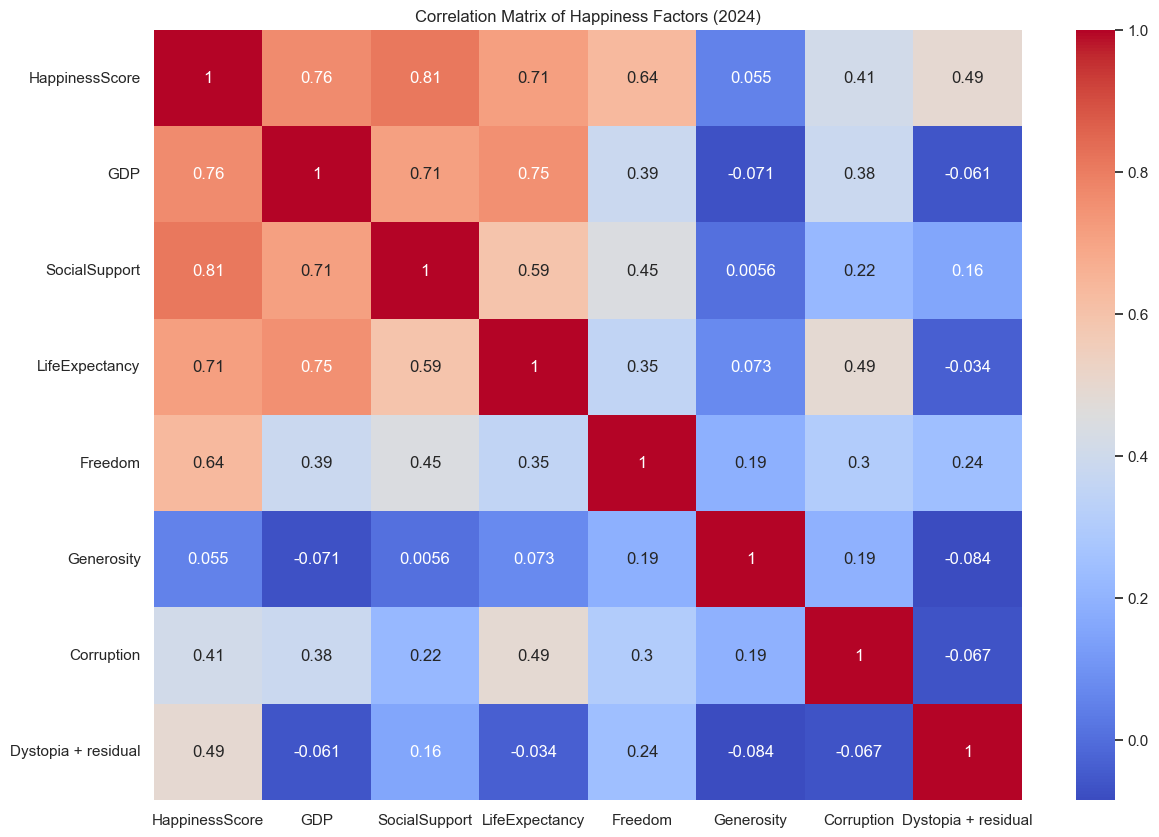

In [8]:
corr = df_for_corr.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Happiness Factors (2024)")
plt.show()

### **Correlation Insights:**

#### 1. **Happiness and Key Factors**:
- **Happiness Score** shows the **strongest positive correlation** with:
  - **Social Support**: 0.81
  - **GDP**: 0.76
  - **Life Expectancy**: 0.71  
  This suggests that countries with higher social support, GDP, and life expectancy tend to have higher happiness levels.

#### 2. **Economic Factors**:
- **GDP** positively correlates with all other factors, especially:
  - **Happiness Score** (0.76)
  - **Life Expectancy** (0.75)  
  This indicates that economic development contributes to overall well-being.

- We observe a lower correlation with **Freedom** (0.38), suggesting that while economic prosperity matters, it's not the only factor influencing happiness.

#### 3. **Social Support**:
- **Social Support** has a strong correlation with **Happiness Score** (0.81), highlighting the importance of social networks in improving quality of life.
- It shows a moderate correlation with **Life Expectancy** (0.59) and **GDP** (0.71), indicating social support is significant but has a lesser impact on other factors.

#### 4. **Freedom and Corruption**:
- **Freedom** shows a moderate positive correlation with **Happiness Score** (0.63), suggesting greater freedom often leads to higher happiness.
- **Corruption** has a moderate positive correlation with **Happiness Score** (0.41), indicating that reducing corruption could improve happiness.

#### 5. **Generosity**:
- **Generosity** shows a very weak correlation with **Happiness Score** (0.05), suggesting generosity is not a major factor in happiness.


### **Key Observations**:
- **Social Support** and **GDP** have the most significant positive impact on happiness, reinforcing the importance of economic development and social safety nets.
- **Freedom** and **Corruption** also matter, though their effects are less pronounced compared to socio-economic factors.
- **Generosity** is less impactful on happiness compared to other variables.


### **Recommendations**:
To improve happiness levels in countries:
- Focus on **economic development** (GDP).
- Enhance **social support** networks.
- Work on **reducing corruption** and increasing **freedom**.

### Top-20 Happiest Countries (2024)

In [9]:
top20 = happiness_df.sort_values(by='HappinessScore', ascending=False).head(20)
print(top20[['Country', 'HappinessScore']])


        Country  HappinessScore
0       Finland           7.736
1       Denmark           7.521
2       Iceland           7.515
3        Sweden           7.345
4   Netherlands           7.306
5    Costa Rica           7.274
6        Norway           7.262
7        Israel           7.234
8    Luxembourg           7.122
9        Mexico           6.979
10    Australia           6.974
11  New Zealand           6.952
12  Switzerland           6.935
13      Belgium           6.910
14      Ireland           6.889
15    Lithuania           6.829
16      Austria           6.810
17       Canada           6.803
18     Slovenia           6.792
19      Czechia           6.775


### Clustering Countries Based on Happiness Factors (2024)

In [10]:
# 1. Preparing Data
df_for_clustering = happiness_df.copy()
df_for_clustering = df_for_clustering.drop(columns=['Country'])

# 2. Scaling Features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_for_clustering)

# 3. PCA Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

In [11]:
# 4. KMeans. Optimal Number of Clusters (Elbow Method)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

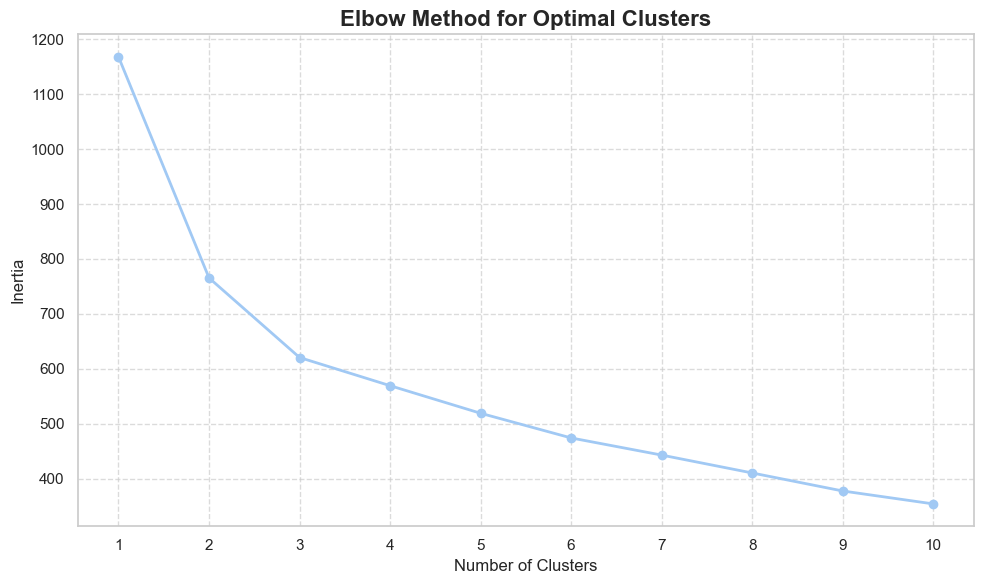

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")

plt.plot(range(1, 11), inertia, marker='o', linestyle='-', linewidth=2)
plt.title('Elbow Method for Optimal Clusters', fontsize=16, weight='bold')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


***Although the elbow method indicates 3 clusters, 4 clusters allow us to more clearly distinguish groups of countries by happiness and socioeconomic factors.***

In [ ]:
# 5. KMeans Clustering (4 clusters based on Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add clusters to the dataset
df_for_clustering['Cluster'] = clusters

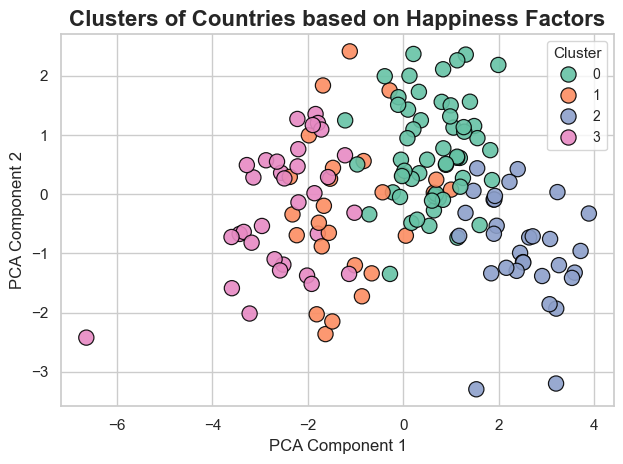

In [22]:
# 6. Visualizing Clusters

palette = sns.color_palette("Set2", n_colors=len(set(clusters)))

sns.scatterplot(
    x=pca_components[:, 0], y=pca_components[:, 1],
    hue=clusters,
    palette=palette,
    s=120,
    alpha=0.9,
    edgecolor='black'
)

plt.title('Clusters of Countries based on Happiness Factors', fontsize=16, weight='bold')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


### Cluster Statistics

In [23]:
df_for_clustering['Country'] = happiness_df['Country']

In [24]:
# 1. Number of Countries per Cluster
cluster_counts = df_for_clustering['Cluster'].value_counts().sort_index()

print("\033[1mNumber of Countries in Each Cluster:\033[0m")
print(cluster_counts.to_string(), "\n")

# 2. Average Happiness Score per Cluster
mean_happiness_by_cluster = df_for_clustering.groupby('Cluster')['HappinessScore'].mean()

print("\033[1mAverage Happiness Score per Cluster:\033[0m")
print(mean_happiness_by_cluster.to_string(), "\n")

# 3. Cluster Centers (Average Values)
cluster_centers = df_for_clustering.groupby('Cluster').mean(numeric_only=True)

print("\033[1mAverage Factor Values per Cluster:\033[0m")
print(cluster_centers.to_string(), "\n")

# 4. List of Countries in Each Cluster
countries_by_cluster = df_for_clustering.groupby('Cluster')['Country'].apply(list)

print("\033[1mCountries in Each Cluster:\033[0m")
for cluster, countries in countries_by_cluster.items():
    print(f"\033[1mCluster {cluster}:\033[0m")
    print(", ".join(countries))  
    print("-" * 50)


Number of Countries in Each Cluster:
Cluster
0    56
1    26
2    31
3    33 

Average Happiness Score per Cluster:
Cluster
0    6.070661
1    4.927385
2    6.807387
3    4.089333 

Average Factor Values per Cluster:
           Year  HappinessScore       GDP  SocialSupport  LifeExpectancy   Freedom  Generosity  Corruption  Dystopia + residual
Cluster                                                                                                                        
0        2024.0        6.070661  1.459750       1.489982        0.596446  0.774726    0.071429    0.107072             1.576693
1        2024.0        4.927385  1.000077       1.201885        0.421692  0.781731    0.179538    0.092808             1.249500
2        2024.0        6.807387  1.754613       1.618548        0.806710  0.873387    0.155548    0.300032             1.298419
3        2024.0        4.089333  0.911455       0.896879        0.335648  0.563000    0.093667    0.112333             1.185593 

Countries in 

### Choropleth Map of Global Happiness Clusters

In [25]:

# Create a copy of the DataFrame containing countries and their assigned clusters
map_df = df_for_clustering[["Country", "Cluster"]].copy()

# Replace country names to match standard map naming conventions
country_replacements = {
    "Côte d’Ivoire": "Ivory Coast",
    "Lao PDR": "Laos",
    "State of Palestine": "Palestine",
    "Republic of Moldova": "Moldova",
    "Viet Nam": "Vietnam",
    "Iran": "Iran, Islamic Republic of",
    "Syrian Arab Republic": "Syria",
    "Hong Kong SAR of China": "Hong Kong",
    "Taiwan Province of China": "Taiwan",
    "Republic of Korea": "South Korea",
    "United States": "United States of America",
    "United Kingdom": "UK",
    "DR Congo": "Democratic Republic of the Congo"
}
map_df["Country"] = map_df["Country"].replace(country_replacements)

# Create a choropleth map visualizing clusters
fig = px.choropleth(
    map_df,
    locations="Country",
    locationmode="country names",
    color="Cluster",
    title="World Happiness Clusters in 2024",
    color_continuous_scale=px.colors.qualitative.Vivid,
    template="plotly_white",
    width=1000,
    height=600
)


fig.add_scattergeo(
    lon=[105.0],  
    lat=[57.5],   
    text=["<b>Ukrainian Ocean</b>"],  
    mode='text',
    showlegend=False,  
    textfont=dict(
        size=10,
        color='black'
    )
)
fig.add_scattergeo(
    lon=[37.6176], 
    lat=[55.7558],
    text=["<b>Kharkiv lagoon</b>"],
    mode='text',
    showlegend=False,  
    textfont=dict(
        size=6,
        color='black'
    )
)

fig.add_scattergeo(
    lon=[34.0],  
    lat=[44.9], 
    text=["<b>Crimea is Ukraine🇺🇦</b>"],
    mode='text',
    showlegend=False,
    textfont=dict(
        size=2,
        color='darkblue'
    )
)


fig.update_layout(
    title_font_size=24,
    geo=dict(showframe=False, showcoastlines=True),
    margin=dict(l=0, r=0, t=60, b=0)
 )

fig.show()




### Descriptive Statistics of the Happiness Dataset (2024, 146 countries)

In [26]:
happiness_df.describe().round(2)

,Year,HappinessScore,GDP,SocialSupport,LifeExpectancy,Freedom,Generosity,Corruption,Dystopia + residual
count,146.0,146.00,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,2024.0,5.58,1.32,1.33,0.55,0.75,0.11,0.15,1.37
std,0.0,1.16,0.39,0.35,0.22,0.18,0.06,0.11,0.52
min,2024.0,1.36,0.00,0.00,0.00,0.00,0.00,0.00,-0.10
25%,2024.0,4.69,1.04,1.13,0.41,0.66,0.07,0.07,1.12
50%,2024.0,5.86,1.34,1.43,0.55,0.77,0.11,0.12,1.40
75%,2024.0,6.49,1.65,1.59,0.71,0.88,0.15,0.18,1.68
max,2024.0,7.74,2.03,1.84,0.95,1.02,0.32,0.52,2.70


### **Summary of 2024 Happiness Statistics (146 Countries)**

1. **Happiness Score**

* **Mean**: 5.58 | **Median**: 5.86 | **Range**: 1.36–7.74
* Distribution is slightly skewed toward less happy countries. Most countries fall between 4.7 and 6.5, but outliers with very low scores lower the global average.

2. **Log GDP per Capita**

* **Mean**: 1.32 | **Range**: 0.00–2.03 (≈\$0–\$80,000 PPP)
* Substantial income inequality persists. A strong positive correlation with happiness (≈0.76) confirms GDP as a key driver of well-being.

3. **Social Support**

* **Mean**: 1.33 | **Range**: 0.00–1.84
* Indicates whether people feel they can rely on others. Extremely low values in some countries point to fragile or missing social capital.

4. **Healthy Life Expectancy**

* **Mean**: 0.55 (≈50–70 healthy years)
* Some countries show very low or even zero values, likely due to poor health systems or missing data. Overall, disparities are substantial.

5. **Freedom to Make Life Choices**

* **Mean**: 0.75 | **Range**: 0.00–1.02
* Most countries score above 0.66, yet a minority report no perceived autonomy at all—possibly due to conflict, repression, or misinformation.

6. **Generosity**

* **Mean**: 0.11 | **Max**: 0.32
* Generally low across the globe. Some countries record no philanthropic behavior, making this the least impactful factor in the happiness model.

7. **Perceptions of Corruption**

* **Mean**: 0.15 | **Range**: 0.00–0.52
* High variability, with many zeros suggesting either normalized distrust or limited survey capacity. Corruption continues to undermine institutional trust worldwide.

8. **Dystopia + Residual**

* **Mean**: 1.37 | **Range**: -0.10–2.70
* This synthetic component reflects the baseline plus unexplained variance. Negative outliers may indicate data artifacts or unique national contexts.

---

### **Key Takeaways**

* **GDP**, **Social Support**, and **Health** are the most influential factors in happiness outcomes.
* **Freedom** also plays a critical role, especially in mid-to-high-income countries.
* **Generosity** and **Corruption Perception** have relatively weaker influence but still reflect key aspects of societal function.
* The 2024 data reveals pronounced global inequalities in both subjective well-being and structural conditions.
* These findings highlight the importance of strengthening public institutions, healthcare systems, and social trust to enhance global well-being.

In [27]:
import pycountry
export_df = df_for_clustering[["Country", "Cluster"]].copy()

# Додай ISO Alpha-3 коди країн (для картографії)

def get_iso_alpha(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except:
        return None

export_df["iso_alpha"] = export_df["Country"].apply(get_iso_alpha)

# Фільтруємо лише країни, які вдалося знайти
export_df = export_df.dropna(subset=["iso_alpha"])

# Збереження
export_df.to_csv("../data/clustered_happiness.csv", index=False)
